In [1]:
import os

In [2]:
pwd

'C:\\Users\\SeshaSai Guna\\Python assignments\\Deep Learning cute\\Problem2'

In [3]:
os.chdir("F:\\assignment files\\Deep Learning Cute\\Problem2")

In [4]:
import pandas as pd
train=pd.read_csv("traindata-1548399384664.csv",encoding='latin-1')

In [5]:
test=pd.read_csv("testdata-1548399401363.csv",encoding='latin-1')
test

,Unnamed: 0,Name,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Rating
0,0,biaxin,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,high
1,1,lamictal,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,high
2,2,depakene,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,low
3,3,sarafem,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,high
4,4,accutane,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,high
5,5,biaxin,Marginally Effective,No Side Effects,sinus infection,By the end of the 10-day treatment I felt bett...,I felt no significant side effects - perhaps s...,Basically the treatment did not seem to work. ...,low
6,6,carbamazepine,Considerably Effective,Moderate Side Effects,seizure,reduction in seizures reduction in seizures re...,tired/sleepy very tired sleep and tired very t...,took it for seizure took pills drank with wate...,high
7,7,ultram-er,Highly Effective,Mild Side Effects,cervical disk degeneration and lower back pain,Ive been taking Tramadol for 2 weeks now. Ive ...,I have had no side effects so far. I hope it s...,"Treating for neck, shoulder, arms, lower back,...",high
8,8,klonopin,Highly Effective,No Side Effects,panic disorder,I immediately stopped having panic attacks. I...,I experienced no side effects. I was not tire...,I started both klonopin and prozac together. ...,high
9,9,effexor,Marginally Effective,Extremely Severe Side Effects,depression,the presumed benefits were to help with a seve...,here we go.the initial effect would be dry mou...,family doctor initially prescribed wellbutin b...,low


In [6]:
train=train.drop('Unnamed: 0',axis=1)
test=test.drop('Unnamed: 0',axis=1)
test.shape
train.shape

(3107, 8)

In [7]:
train["var1"] = train["effectiveness"]+"."+train["sideEffects"]+"."+train["condition"]+"."+ train["benefitsReview"]+"."+train["sideEffectsReview"]+"."+train["commentsReview"]

In [8]:
test["var2"] = test["effectiveness"]+"."+test["sideEffects"]+"."+test["condition"]+"."+ test["benefitsReview"]+"."+test["sideEffectsReview"]+"."+test["commentsReview"]

In [10]:
## Define the sequence lengths, max number of words and embedding dimensions
MAX_SEQUENCE_LENGTH = 1000   # Sequence length of each sentence. If more, crop. If less, pad with zeros
MAX_NB_WORDS = 25000        # Top 20000 frequently occuring words

In [11]:
## Import Libraries 
import numpy as np      # for array operations
import pandas as pd     # for reading data operations

from keras.preprocessing.text import Tokenizer          # for tokenizing text
from keras.preprocessing.sequence import pad_sequences  # for padding sentences with zeros. To make the sentence length same
from keras.utils import to_categorical                  # for one-hot encoding of the labels
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D, Embedding
from keras.models import Sequential

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
train["var1"] = train["var1"].astype("str")
test["var2"] = test["var2"].astype("str")

In [13]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)   # get the frequently occuring words
tokenizer.fit_on_texts(train.var1)           
train_sequences = tokenizer.texts_to_sequences(train.var1)
test_sequences = tokenizer.texts_to_sequences(test.var2)

word_index = tokenizer.word_index               # dictionary containing words and their index
print(tokenizer.word_index)                   # print to check
print('Found %s unique tokens.' % len(word_index)) # total words in the corpus
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH) # get only the top frequent words on train
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)   # get only the top frequent words on test

print(train_data.shape)
print(test_data.shape)

{'i': 1, 'the': 2, 'to': 3, 'and': 4, 'a': 5, 'of': 6, 'my': 7, 'it': 8, 'was': 9, 'side': 10, 'effects': 11, 'in': 12, 'for': 13, 'effective': 14, 'that': 15, 'have': 16, 'with': 17, 'not': 18, 'this': 19, 'on': 20, 'no': 21, 'had': 22, 'but': 23, 'is': 24, 'as': 25, 'me': 26, 'after': 27, 'at': 28, 'day': 29, 'take': 30, 'taking': 31, 'pain': 32, 'mild': 33, 'highly': 34, 'or': 35, 'drug': 36, 'so': 37, 'very': 38, 'be': 39, 'when': 40, 'more': 41, 'severe': 42, 'medication': 43, 'did': 44, 'were': 45, 'from': 46, 'would': 47, '\r\r': 48, 'time': 49, 'also': 50, 'one': 51, 'if': 52, 'about': 53, 'up': 54, 'am': 55, 'treatment': 56, 'which': 57, 'depression': 58, 'considerably': 59, 'all': 60, 'skin': 61, 'days': 62, 'took': 63, '2': 64, 'an': 65, 'first': 66, 'been': 67, 'only': 68, 'any': 69, 'has': 70, 'years': 71, 'sleep': 72, 'before': 73, 'then': 74, 'mg': 75, 'get': 76, 'you': 77, 'by': 78, 'started': 79, 'some': 80, 'feel': 81, 'like': 82, 'night': 83, 'months': 84, 'moderate'

In [14]:
train_labels = train["rating"]
test_labels = test["Rating"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

#print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1, 2], dtype=int64), array([1780,  661,  666], dtype=int64))
(array([0, 1, 2], dtype=int64), array([549, 241, 246], dtype=int64))


In [15]:
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (3107, 1000)
Shape of label tensor: (3107, 3)
Shape of label tensor: (1036, 3)


In [16]:
from keras.regularizers import l2
from keras.layers import Dense, Input, LSTM, ActivityRegularization


print('Training model.')
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(MAX_NB_WORDS,
                    EMBEDDING_DIM,
                    input_length=MAX_SEQUENCE_LENGTH
                    ))
model.add(Conv1D(32, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

Training model.


In [23]:
EMBEDDING_DIM = 100

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         2500000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 998, 32)           9632      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 996, 64)           6208      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total para

In [21]:
model.fit(train_data, labels_train,
          batch_size=32,
          epochs=3,
          validation_split=0.3)

Train on 2174 samples, validate on 933 samples
Epoch 1/3
2174/2174 [==============================] - 12s 5ms/step - loss: 0.0627 - acc: 0.9802 - val_loss: 0.6704 - val_acc: 0.7706
Epoch 2/3
2174/2174 [==============================] - 12s 6ms/step - loss: 0.0394 - acc: 0.9880 - val_loss: 0.7227 - val_acc: 0.7771
Epoch 3/3
2174/2174 [==============================] - 12s 6ms/step - loss: 0.0301 - acc: 0.9899 - val_loss: 0.7774 - val_acc: 0.7588


In [22]:
model.evaluate(test_data, labels_test)

1036/1036 [==============================] - 1s 1ms/step


[0.7494571937902553, 0.7596525098826434]

In [46]:
model.save_weights("model_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
#with dropout
from keras.regularizers import l2
from keras.layers import Dense, Input, LSTM, ActivityRegularization


print('Training model.')
EMBEDDING_DIM = 64

model = Sequential()
model.add(Embedding(MAX_NB_WORDS,
                    EMBEDDING_DIM,
                    input_length=MAX_SEQUENCE_LENGTH
                    ))
model.add(Conv1D(32, 3, activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
model.add(GlobalMaxPool1D())
#model.add(Dropout(0.25))

ActivityRegularization(l1=0.01, l2=0.001)

model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

Training model.


In [49]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1000, 64)          1600000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 998, 32)           6176      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 996, 32)           3104      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 1539      
Total params: 1,627,715
Trainable params: 1,627,715
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(train_data, labels_train,
          batch_size=32,
          epochs=3,
          validation_split=0.3)

Train on 2174 samples, validate on 933 samples
Epoch 1/3
2174/2174 [==============================] - 8s 4ms/step - loss: 0.0845 - acc: 0.9798 - val_loss: 0.6518 - val_acc: 0.7706
Epoch 2/3
2174/2174 [==============================] - 8s 4ms/step - loss: 0.0336 - acc: 0.9931 - val_loss: 0.6995 - val_acc: 0.7878
Epoch 3/3
2174/2174 [==============================] - 8s 4ms/step - loss: 0.0119 - acc: 0.9968 - val_loss: 0.7609 - val_acc: 0.7760


In [53]:
model.evaluate(test_data, labels_test)

1036/1036 [==============================] - 1s 743us/step


[0.7577437812527175, 0.7741312743614079]

In [54]:
model.save_weights("model_cnn1.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
#building lstm model
model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(input_dim = MAX_NB_WORDS,
                    input_length=MAX_SEQUENCE_LENGTH,
                    output_dim =128)) # Add an embedding layer which represents each unique token as a vector
model.add(LSTM(50, return_sequences=True)) # Add an LSTM layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(3, activation='softmax'))

In [43]:
model.compile(optimizer=adam,                  # 'Adam' is a variant of gradient descent technique
              loss='categorical_crossentropy', # categorical_crossentropy for multi-class classification
              metrics=['accuracy'])            # These metrics are computed for evaluating and stored in history

In [45]:
model.evaluate(test_data, labels_test)

1036/1036 [==============================] - 4s 4ms/step


[2.6995592862942965, 0.5366795365644698]

In [44]:
model.fit(train_data, labels_train, epochs=10, validation_split=0.25)

Train on 2330 samples, validate on 777 samples
Epoch 1/10
2330/2330 [==============================] - 60s 26ms/step - loss: 0.9644 - acc: 0.5755 - val_loss: 0.9510 - val_acc: 0.5701
Epoch 2/10
2330/2330 [==============================] - 66s 28ms/step - loss: 0.6798 - acc: 0.7150 - val_loss: 1.1106 - val_acc: 0.5650
Epoch 3/10
2330/2330 [==============================] - 65s 28ms/step - loss: 0.3292 - acc: 0.8807 - val_loss: 1.1999 - val_acc: 0.5766
Epoch 4/10
2330/2330 [==============================] - 69s 29ms/step - loss: 0.1237 - acc: 0.9609 - val_loss: 1.5833 - val_acc: 0.5418
Epoch 5/10
2330/2330 [==============================] - 89s 38ms/step - loss: 0.0469 - acc: 0.9876 - val_loss: 1.8578 - val_acc: 0.5637
Epoch 6/10
2330/2330 [==============================] - 84s 36ms/step - loss: 0.0284 - acc: 0.9914 - val_loss: 2.2902 - val_acc: 0.5740
Epoch 7/10
2330/2330 [==============================] - 67s 29ms/step - loss: 0.0111 - acc: 0.9948 - val_loss: 2.1550 - val_acc: 0.5470
E

In [38]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(input_dim = MAX_NB_WORDS, input_length=MAX_SEQUENCE_LENGTH,output_dim =128))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(10,return_sequences=True))
    model_conv.add(LSTM(10,return_sequences=False))
    model_conv.add(Dense(3, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv

In [57]:
model_conv = create_conv_model()
history = model.fit(train_data, labels_train, epochs=5, validation_split=0.30)

Train on 2174 samples, validate on 933 samples
Epoch 1/5
2174/2174 [==============================] - 8s 4ms/step - loss: 0.0033 - acc: 0.9977 - val_loss: 0.8790 - val_acc: 0.7738
Epoch 2/5
2174/2174 [==============================] - 8s 3ms/step - loss: 0.0027 - acc: 0.9977 - val_loss: 0.8945 - val_acc: 0.7717
Epoch 3/5
2174/2174 [==============================] - 8s 4ms/step - loss: 0.0027 - acc: 0.9982 - val_loss: 0.9101 - val_acc: 0.7696
Epoch 4/5
2174/2174 [==============================] - 8s 4ms/step - loss: 0.0026 - acc: 0.9982 - val_loss: 0.9199 - val_acc: 0.7738
Epoch 5/5
2174/2174 [==============================] - 9s 4ms/step - loss: 0.0026 - acc: 0.9986 - val_loss: 0.9452 - val_acc: 0.7749


In [61]:
model.evaluate(test_data, labels_test)

1036/1036 [==============================] - 1s 729us/step


[0.9116453239586363, 0.7876447878749214]

In [62]:
model.save_weights("model_lstm.h5")
print("Saved model to disk")

Saved model to disk


In [58]:
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

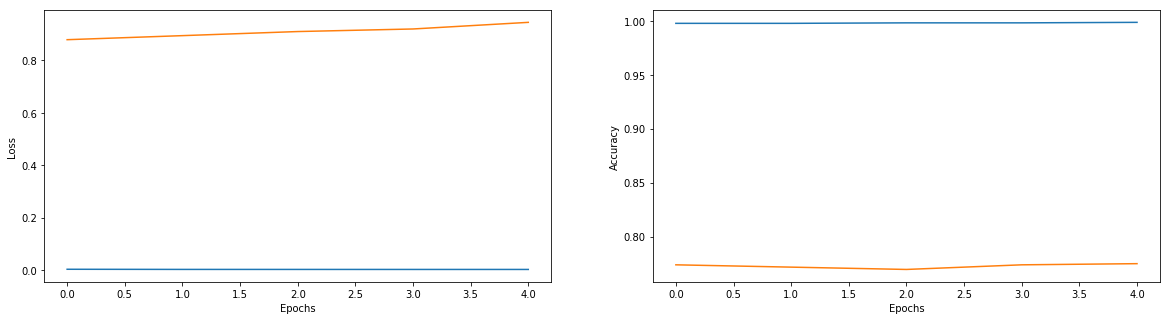

In [59]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)